# Supply Chain - Capstone (FMCG company)

In [ ]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,cohen_kappa_score

# import function to perform feature selection
from sklearn.feature_selection import RFE


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve, accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## Read Data

In [ ]:
df=pd.read_csv("Data.csv")
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.000000,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.000000,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.000000,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.000000,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.000000,2009.000000,18,0,C,6,24,24071


In [ ]:
df.shape

(25000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Prepruning of Features - removing unnecessary data.

In [ ]:
SCM = df.copy()

In [ ]:
#SCM.head()
SCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
SCM.drop(['Ware_house_ID','WH_Manager_ID'], inplace = True, axis =1)

In [ ]:
SCM.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.000000,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.000000,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.000000,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.000000,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.000000,2009.000000,18,0,C,6,24,24071


### Missing Value treatment

In [ ]:
SCM.isnull().sum()*100/len(SCM)

Location_type                   0.000000
WH_capacity_size                0.000000
zone                            0.000000
WH_regional_zone                0.000000
num_refill_req_l3m              0.000000
transport_issue_l1y             0.000000
Competitor_in_mkt               0.000000
retail_shop_num                 0.000000
wh_owner_type                   0.000000
distributor_num                 0.000000
flood_impacted                  0.000000
flood_proof                     0.000000
electric_supply                 0.000000
dist_from_hub                   0.000000
workers_num                     3.960000
wh_est_year                    47.524000
storage_issue_reported_l3m      0.000000
temp_reg_mach                   0.000000
approved_wh_govt_certificate    3.632000
wh_breakdown_l3m                0.000000
govt_check_l3m                  0.000000
product_wg_ton                  0.000000
dtype: float64

It is impossible to have a warehouse with '0' worker numbers, also it is a essential data for model building, so treating with mean.
Warehouse estimated year is not required to build the model, also it has more than 30% missing value so droping the column.
Govt approval certificate is a considerable feature to build a model so we can treat it with mode.

In [ ]:
SCM.drop(['wh_est_year'],axis=1, inplace= True)

In [ ]:
SCM.workers_num.fillna(SCM.workers_num.mean(),inplace=True)

In [ ]:
SCM.approved_wh_govt_certificate.fillna(SCM.approved_wh_govt_certificate.mode()[0],inplace=True)

In [ ]:
SCM.isnull().sum()*100/len(SCM)

Location_type                  0.000000
WH_capacity_size               0.000000
zone                           0.000000
WH_regional_zone               0.000000
num_refill_req_l3m             0.000000
transport_issue_l1y            0.000000
Competitor_in_mkt              0.000000
retail_shop_num                0.000000
wh_owner_type                  0.000000
distributor_num                0.000000
flood_impacted                 0.000000
flood_proof                    0.000000
electric_supply                0.000000
dist_from_hub                  0.000000
workers_num                    0.000000
storage_issue_reported_l3m     0.000000
temp_reg_mach                  0.000000
approved_wh_govt_certificate   0.000000
wh_breakdown_l3m               0.000000
govt_check_l3m                 0.000000
product_wg_ton                 0.000000
dtype: float64

In [ ]:
SCM.duplicated().sum()

0

#### Missing values are treated and there is no duplciate value in the data now.
(Prior checking for duplciate values remove the unique features from the dataset. i.e. ID number, if not the duplicated will not be shown)

In [ ]:
#Outlier check

SCM.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.000000,4.089040,2.606612,0.000000,2.000000,4.000000,6.000000,8.000000
transport_issue_l1y,25000.000000,0.773680,1.199449,0.000000,0.000000,0.000000,1.000000,5.000000
Competitor_in_mkt,25000.000000,3.104200,1.141663,0.000000,2.000000,3.000000,4.000000,12.000000
retail_shop_num,25000.000000,4985.711560,1052.825252,1821.000000,4313.000000,4859.000000,5500.000000,11008.000000
distributor_num,25000.000000,42.418120,16.064329,15.000000,29.000000,42.000000,56.000000,70.000000
flood_impacted,25000.000000,0.098160,0.297537,0.000000,0.000000,0.000000,0.000000,1.000000
flood_proof,25000.000000,0.054640,0.227281,0.000000,0.000000,0.000000,0.000000,1.000000
electric_supply,25000.000000,0.656880,0.474761,0.000000,0.000000,1.000000,1.000000,1.000000
dist_from_hub,25000.000000,163.537320,62.718609,55.000000,109.000000,164.000000,218.000000,271.000000
workers_num,25000.000000,28.944398,7.715077,10.000000,24.000000,28.000000,33.000000,98.000000


### Feature Engineering

In [ ]:
SCM['WH_regional_zone']=SCM['WH_regional_zone'].apply(lambda x:x[-1]) # converting Zone 6 as 6; lly for all other Zones

In [ ]:
SCM['WH_regional_zone']=pd.to_numeric(SCM.WH_regional_zone) # converting the data type to numbericals

There are columns which has discrete datas, im converting them from object to numberic numbers.
### Using one hot encoder

In [ ]:
cats = list(SCM.dtypes[SCM.dtypes=='object'].index)

In [ ]:
cats

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [ ]:
SCM_OHE= pd.get_dummies(SCM,columns=cats,prefix=cats, drop_first = True)

In [ ]:
SCM_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

### Checking correlation before and after encoding

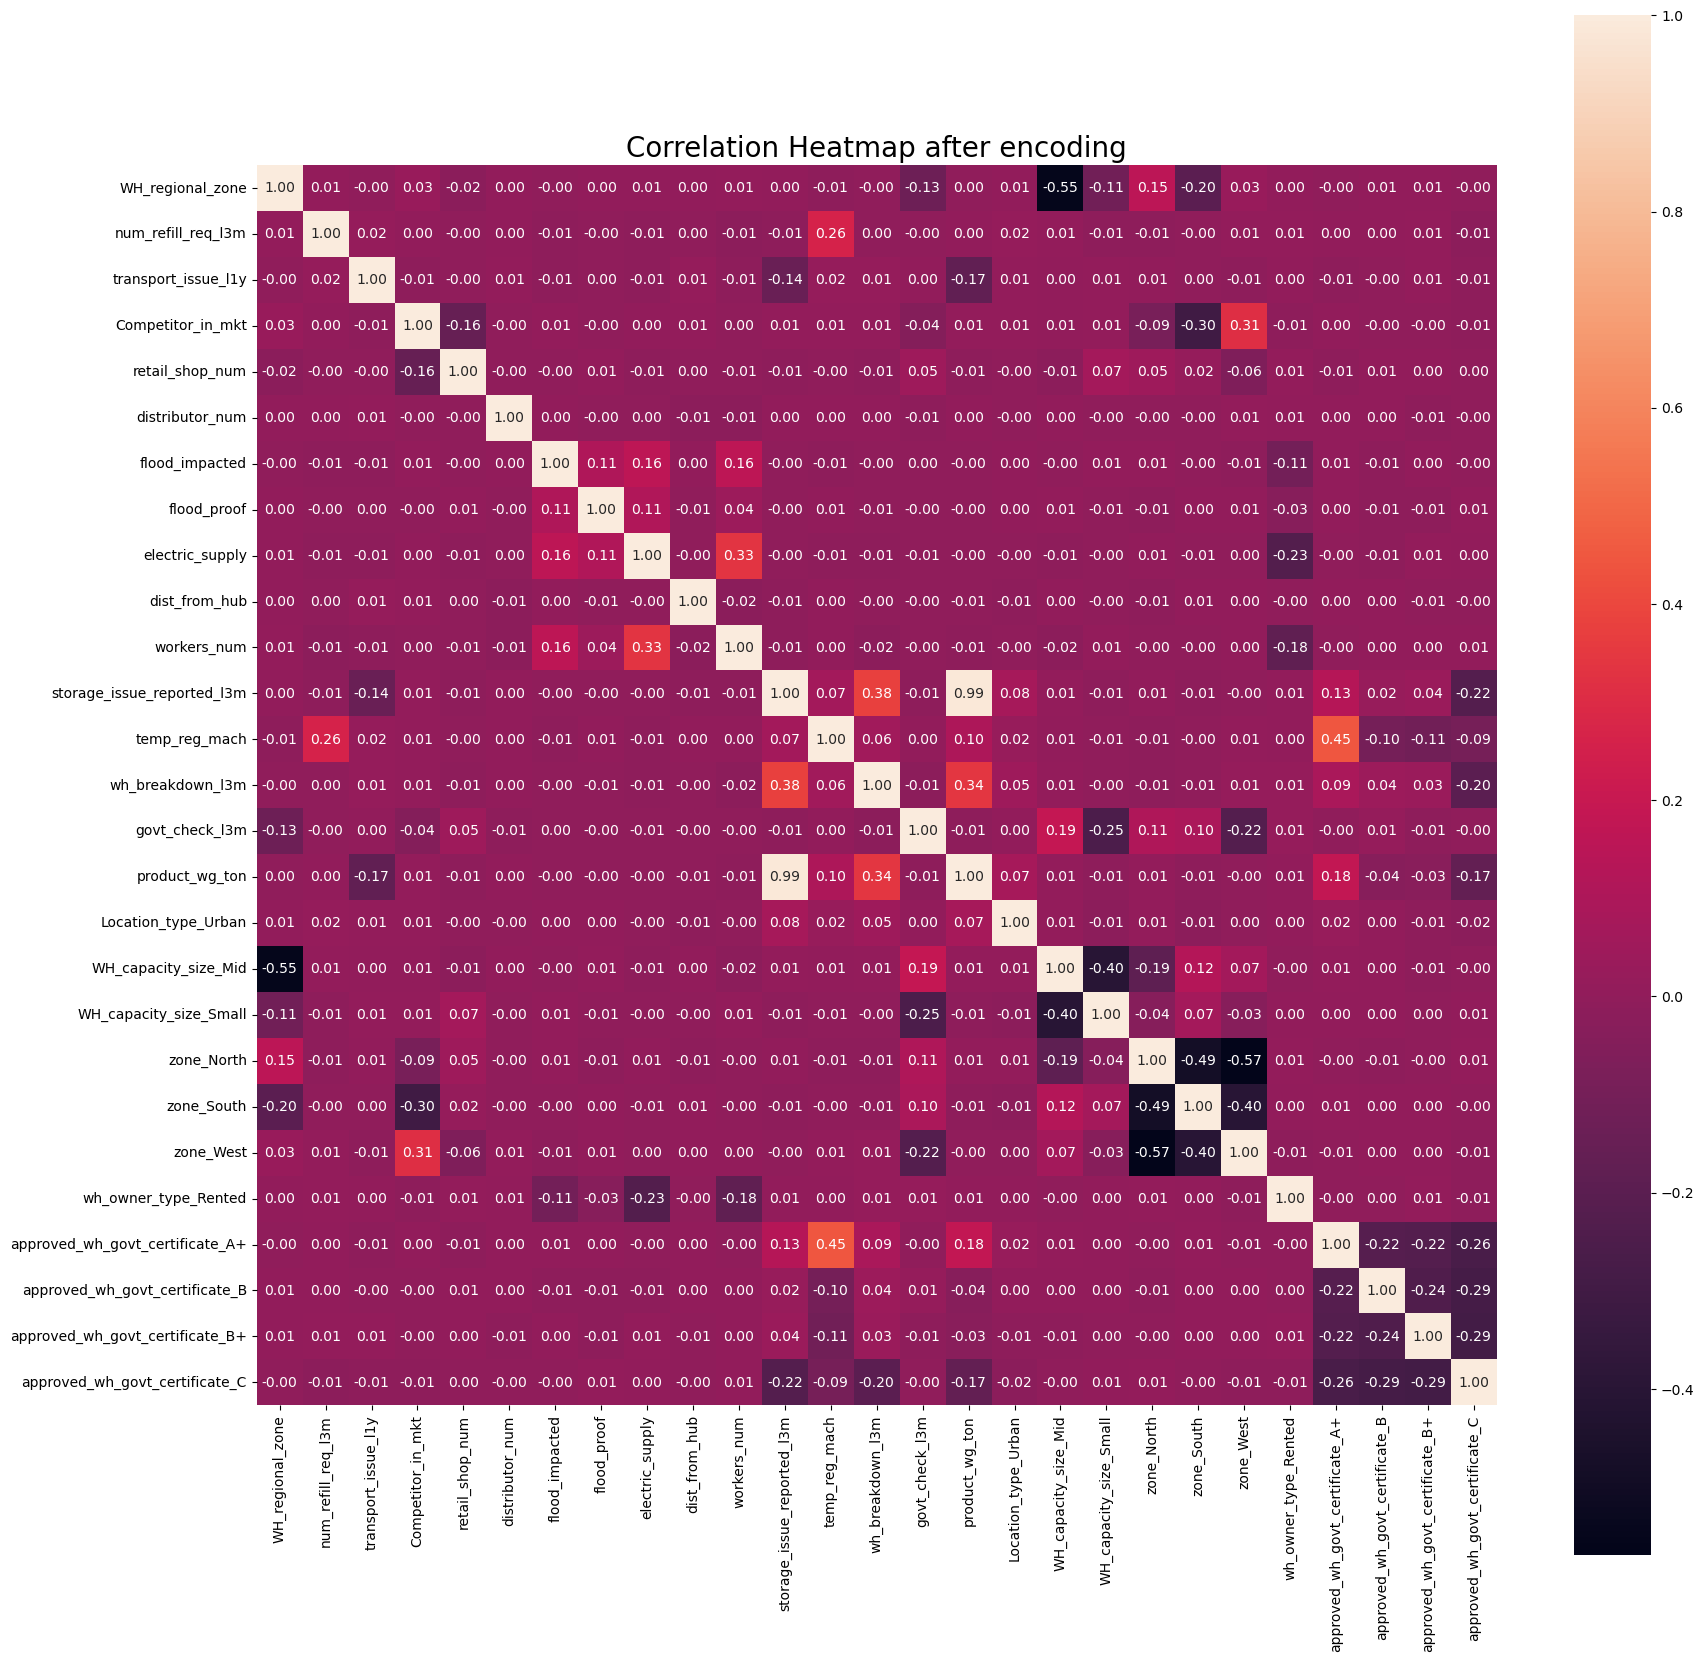

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(SCM_OHE.corr(),cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10})
plt.title("Correlation Heatmap after encoding", fontsize=20, fontweight=100)
plt.show()

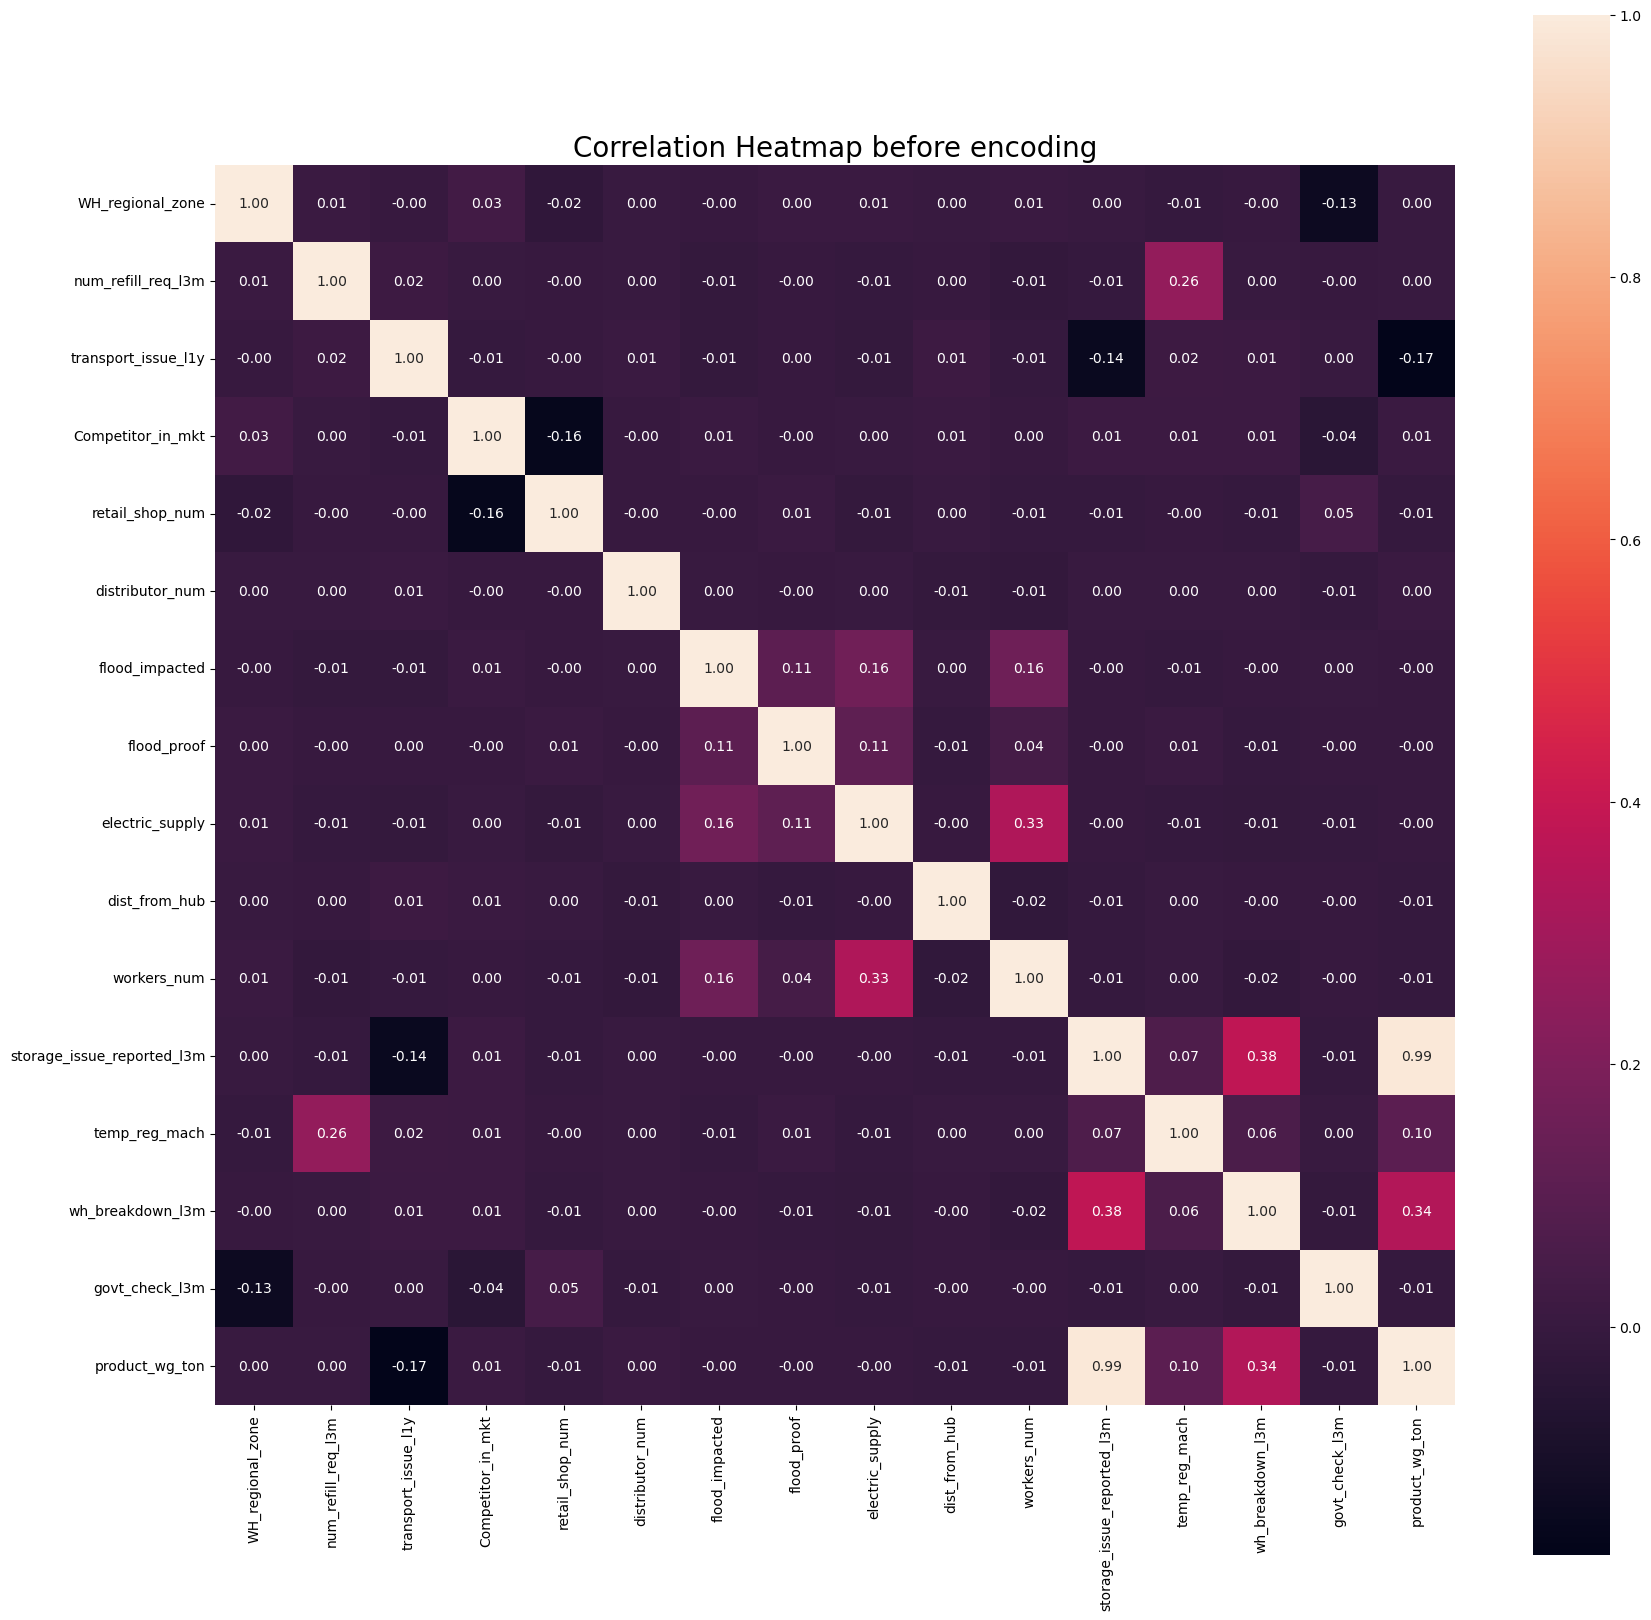

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(SCM.corr(),cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10})
plt.title("Correlation Heatmap before encoding", fontsize=20, fontweight=100)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap after encoding - for column product_wg_ton')

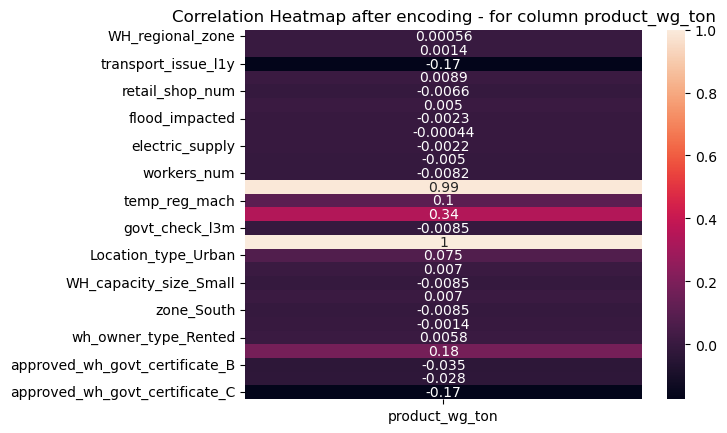

In [ ]:
sns.heatmap(SCM_OHE.corr()[['product_wg_ton']],annot=True)
plt.title("Correlation Heatmap after encoding - for column product_wg_ton")

Text(0.5, 1.0, 'Correlation Heatmap before encoding - for column product_wg_ton')

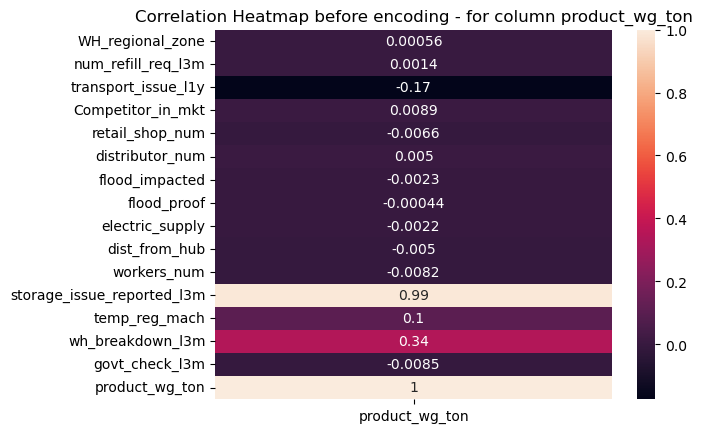

In [ ]:
sns.heatmap(SCM.corr()[['product_wg_ton']],annot=True)
plt.title("Correlation Heatmap before encoding - for column product_wg_ton")

### Outlier Treatment

In [ ]:
SCM_OHE.describe().T

,count,mean,std,min,25%,50%,75%,max
WH_regional_zone,25000.000000,4.251840,1.668283,1.000000,3.000000,5.000000,6.000000,6.000000
num_refill_req_l3m,25000.000000,4.089040,2.606612,0.000000,2.000000,4.000000,6.000000,8.000000
transport_issue_l1y,25000.000000,0.773680,1.199449,0.000000,0.000000,0.000000,1.000000,5.000000
Competitor_in_mkt,25000.000000,3.104200,1.141663,0.000000,2.000000,3.000000,4.000000,12.000000
retail_shop_num,25000.000000,4985.711560,1052.825252,1821.000000,4313.000000,4859.000000,5500.000000,11008.000000
distributor_num,25000.000000,42.418120,16.064329,15.000000,29.000000,42.000000,56.000000,70.000000
flood_impacted,25000.000000,0.098160,0.297537,0.000000,0.000000,0.000000,0.000000,1.000000
flood_proof,25000.000000,0.054640,0.227281,0.000000,0.000000,0.000000,0.000000,1.000000
electric_supply,25000.000000,0.656880,0.474761,0.000000,0.000000,1.000000,1.000000,1.000000
dist_from_hub,25000.000000,163.537320,62.718609,55.000000,109.000000,164.000000,218.000000,271.000000


In [ ]:
for i in SCM_OHE.columns:
    sns.boxplot(SCM_OHE[i])
    plt.title(i)
    plt.show()

Outlier treatment is mandatory for this dataset. Data in all columns are within the range.

Text(0.5, 1.0, 'Storage issue Vs Production')

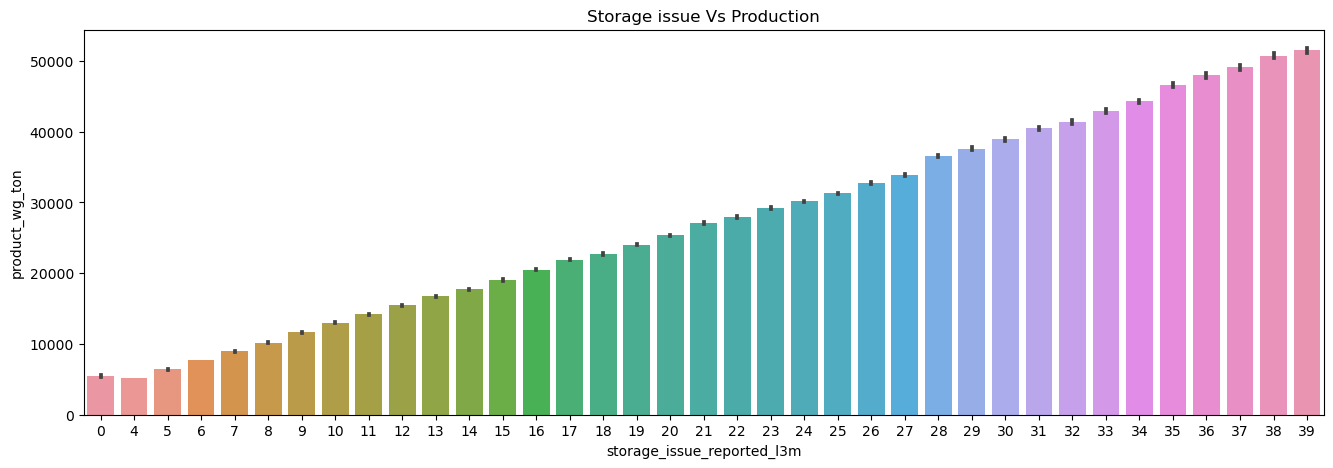

In [ ]:
#EDA
plt.figure(figsize=(16,5))
sns.barplot(x='storage_issue_reported_l3m', y='product_wg_ton', data=df)
plt.title("Storage issue Vs Production")

Text(0.5, 1.0, 'Transport issue Vs Production')

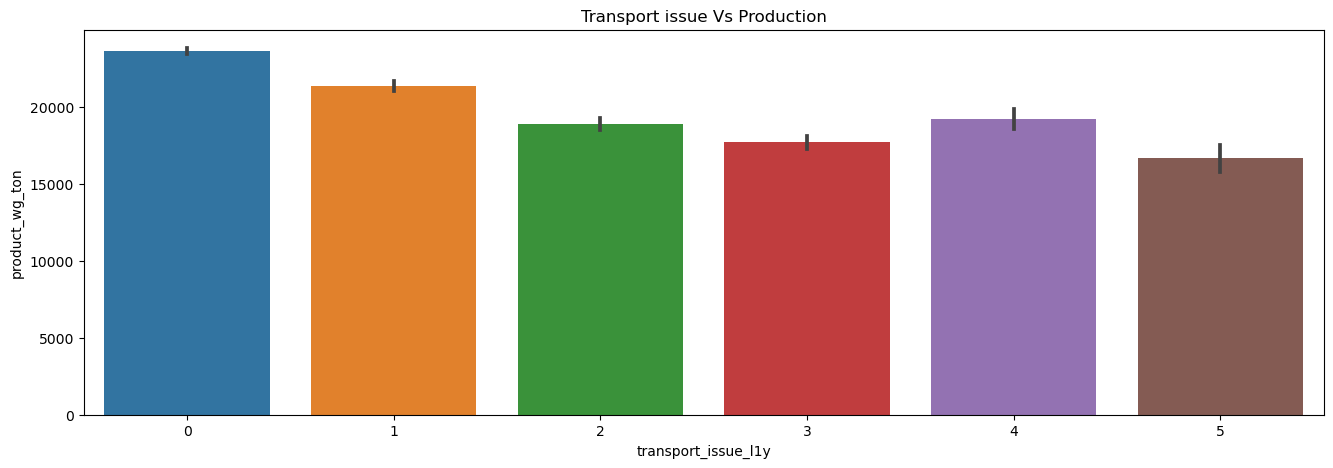

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='transport_issue_l1y', y='product_wg_ton', data=df)
plt.title("Transport issue Vs Production")

In [ ]:
#Clustering
Data=df.copy()

In [ ]:
Data["workers_num"] = Data["workers_num"].fillna(Data["workers_num"].median())
Data["approved_wh_govt_certificate"] = Data["approved_wh_govt_certificate"].fillna(Data["approved_wh_govt_certificate"].mode()[0])
Data= Data.drop('wh_est_year',axis=1)

In [ ]:
def treating_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    IQR_Lower = Q1-(1.5 * IQR)
    IQR_Upper = Q3+(1.5 * IQR)
    return  IQR_Lower,IQR_Upper

In [ ]:
Varaible = list(Data.dtypes[Data.dtypes !='object'].index)
Varaible

In [ ]:
for i in Varaible:
    Lr,Ur = treating_outliers(Data[i])
    Data[i] = np.where(Data[i]<Lr,Lr,Data[i])
    Data[i] = np.where(Data[i]>Ur,Ur,Data[i])

In [ ]:
#Data = Data.drop(columns=["Ware_house_ID","WH_Manager_ID"])
data=Data.copy()

In [ ]:
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 1',1,data['WH_regional_zone'])
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 2',2,data['WH_regional_zone'])
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 3',3,data['WH_regional_zone'])
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 4',4,data['WH_regional_zone'])
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 5',5,data['WH_regional_zone'])
data['WH_regional_zone'] = np.where(data['WH_regional_zone'] == 'Zone 6',6,data['WH_regional_zone'])
data['WH_regional_zone'] = data['WH_regional_zone'].astype('float64')

In [ ]:
data['Location_type'] = np.where(data['Location_type'] == 'Urban',0,data['Location_type'])
data['Location_type'] = np.where(data['Location_type'] == 'Rural',1,data['Location_type'])
data['Location_type'] = data['Location_type'].astype('float64')

In [ ]:
data['WH_capacity_size'] = np.where(data['WH_capacity_size'] == 'Small',0,data['WH_capacity_size'])
data['WH_capacity_size'] = np.where(data['WH_capacity_size'] == 'Large',2,data['WH_capacity_size'])
data['WH_capacity_size'] = np.where(data['WH_capacity_size'] == 'Mid',1,data['WH_capacity_size'])
data['WH_capacity_size'] = data['WH_capacity_size'].astype('float64')

In [ ]:
data['zone'] = np.where(data['zone'] == 'North',0,data['zone'])
data['zone'] = np.where(data['zone'] == 'South',1,data['zone'])
data['zone'] = np.where(data['zone'] == 'East',2,data['zone'])
data['zone'] = np.where(data['zone'] == 'West',3,data['zone'])
data['zone'] = data['zone'].astype('float64')

In [ ]:
data_cat = list(data.dtypes[data.dtypes=='object'].index)

In [ ]:
data= pd.get_dummies(data,columns=data_cat,prefix=data_cat, drop_first = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
data.head()

In [ ]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,12):
    k_means = KMeans(n_clusters = i,random_state=1)
    k_means.fit(data)
    wss.append(k_means.inertia_)
wss_data = pd.DataFrame(wss,columns = ['WSS'])
wss_data['Num_of_clusters'] = range(1,12)
wss_data = wss_data[['Num_of_clusters','WSS']]
wss_data

In [ ]:
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(wss_data['Num_of_clusters'],wss_data['WSS'],'bx-')
plt.title("Elbow Plot for K-Means clustering")
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = {}
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(data)
    labels = kmeans.predict(data)
    silhouette[i] = silhouette_score(data, labels)
plt.figure()
plt.plot(list(silhouette.keys()), list(silhouette.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
silhouette

### Splitting dependent/target and independent variables

In [ ]:
x = SCM_OHE.drop(['product_wg_ton'],axis=1)

In [ ]:
x.info()

In [ ]:
y = SCM_OHE['product_wg_ton']

In [ ]:
# Splitting Data into train and test
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30 , random_state=101)

In [ ]:
# Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
y_train
x_test
x_train

## Model Building - 1

In [ ]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
def performance_all(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    f1_train_wt = f1_score(y_train,y_train_pred,average='weighted')
    f1_test_wt = f1_score(y_test,y_test_pred,average='weighted')
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    scores = cross_val_score(model,x_train,y_train,cv=3,scoring='f1_weighted')
    bias = 1-np.mean(scores)
    var =  np.std(scores)/np.mean(scores)
    return str(model),acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var

In [ ]:
per_df = pd.DataFrame(columns=['Model','Acc_train','Acc_test',
                    'F1_train_wt','F1_test_wt','ROC_AUC_Score','Bias','Variance'])

def alg(model,i):
    model.fit(x_train,y_train)
    mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var=performance_all(model)
    per_df.loc[i] = [mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var]
    return per_df

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    #"Lasso": Lasso(),
    #"Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XG Booster": XGBRegressor(),
    "Cat Boosting Regressor": CatBoostRegressor(verbose=False),
    "Ada Boost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list    = []
rmse       = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #train the model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Train set")
    print("- Root Mean Square Error : {:.4f}",format(model_train_rmse))
    print("- Mean Absolute Error : {:.4f}",format(model_train_mae))
    print("- R2 Score : {:.4f}",format(model_train_r2))

    print( "----------------------------------" )

    print("Model performance for Test set")
    print("- Root Mean Square Error : {:.4f}",format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}",format(model_test_mae))
    print("- R2 Score : {:.4f}",format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse.append(model_test_rmse)

    print('='*35)
    print('\n')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the results
models = ["Linear Regression", "Lasso", "Ridge", "K-Neighbors Regressor",
          "Decision Tree", "Random Forest Regressor", "XG Booster",
          "Cat Boosting Regressor", "Ada Boost Regressor"]
r2_scores = [0.985724, 0.985728, 0.985724, 0.678025, 0.987581,
             0.993264, 0.993183, 0.993711, 0.977886]
rmse = [1390.495117, 1390.306682, 1390.492297, 6603.605483,
        1296.905819, 955.162422, 960.843229, 922.942062, 1730.634898]

# Calculate accuracy (R2 Score) and precision (RMSE)
accuracy = r2_scores
precision = [np.sqrt(mse) for mse in rmse]

# Display results
print("Model Name\t\tAccuracy (R2 Score)\tPrecision (RMSE)")
print("="*55)
for i in range(len(models)):
    print(f"{models[i]:<25}\t{accuracy[i]:.6f}\t\t\t{precision[i]:.6f}")

In [ ]:
# Results

pd.DataFrame(list(zip(model_list,r2_list,rmse)),columns=['Model Name','R2 Score', 'RMSE'])

## Best fit Model

In [ ]:
cb = CatBoostRegressor(verbose=False)
cb.fit(x_train,y_train)

y_train_pred = cb.predict(x_train)
y_test_pred = cb.predict(x_test)

model_train_mae,model_train_rmse,model_train_r2 = evaluate(y_train,y_train_pred)
model_test_mae,model_test_rmse,model_test_r2 = evaluate(y_test,y_test_pred)

print("Model performance for Train set")
print("- Root Mean Square Error : {:.4f}",format(model_train_rmse))
print("- Mean Absolute Error : {:.4f}",format(model_train_mae))
print("- R2 Score : {:.4f}",format(model_train_r2))

print( "----------------------------------" )

print("Model performance for Test set")
print("- Root Mean Square Error : {:.4f}",format(model_test_rmse))
print("- Mean Absolute Error : {:.4f}",format(model_test_mae))
print("- R2 Score : {:.4f}",format(model_test_r2))
r2_list.append(model_test_r2)

print('='*35)
print('\n')

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the CatBoost Regressor
cb = CatBoostRegressor(verbose=False)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}

# Define the scoring function (negative RMSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train CatBoost Regressor with the best hyperparameters
cb_best = CatBoostRegressor(verbose=False, **best_params)
cb_best.fit(x_train, y_train)

# Evaluate the model performance on train set
y_train_pred = cb_best.predict(x_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Model performance for Train set")
print("- Root Mean Square Error : {:.4f}".format(train_rmse))
print("- Mean Absolute Error : {:.4f}".format(train_mae))
print("- R2 Score : {:.4f}".format(train_r2))
print("----------------------------------")

# Evaluate the model performance on test set
y_test_pred = cb_best.predict(x_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model performance for Test set")
print("- Root Mean Square Error : {:.4f}".format(test_rmse))
print("- Mean Absolute Error : {:.4f}".format(test_mae))
print("- R2 Score : {:.4f}".format(test_r2))

In [ ]:
#Plotting

plt.scatter(y_test,y_test_pred);
plt.title('Plotting y_test and y_test_pred')
plt.xlabel('Actual');
plt.ylabel('Predicated');
plt.show()

In [ ]:
#Plotting

plt.scatter(y_test,y_test_pred);
plt.title('Plotting y_test and y_test_pred after tuning')
plt.xlabel('Actual');
plt.ylabel('Predicated');
plt.show()

## Conclusion

I conclude as Cat Boosting REgressorgives the best result as both train and test scores are not much deviatinga and also the R2 score  is best in both train and test cases.

Model performance for Train set
- Root Mean Square Error : 743.0785972621248
- Mean Absolute Error : 573.8415839352367
- R2 Score : 0.9958925981165306
----------------------------------
Model performance for Test set
- Root Mean Square Error : 922.9420624171528
- Mean Absolute Error : 690.1134803658458
- R2 Score : 0.9937106031596094

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_recall_fscore_support

cb = CatBoostRegressor(verbose=False)
cb.fit(x_train, y_train)

y_train_pred = cb.predict(x_train)
y_test_pred = cb.predict(x_test)

model_train_mae, model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)
model_test_mae, model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

print("Model performance for Train set")
print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

precision, recall, fscore, _ = precision_recall_fscore_support(y_train, y_train_pred.round(), average='weighted')
print("- Precision: {:.4f}".format(precision))
print("- Recall: {:.4f}".format(recall))
print("- F1 Score: {:.4f}".format(fscore))

print("----------------------------------")

print("Model performance for Test set")
print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_test_pred.round(), average='weighted')
print("- Precision: {:.4f}".format(precision))
print("- Recall: {:.4f}".format(recall))
print("- F1 Score: {:.4f}".format(fscore))

print('=' * 35)
print('\n')

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    #"Lasso": Lasso(),
    #"Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XG Booster": XGBRegressor(),
    "Cat Boosting Regressor": CatBoostRegressor(verbose=False),
    "Ada Boost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list    = []
rmse       = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #train the model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Train set")
    print("- Root Mean Square Error : {:.4f}",format(model_train_rmse))
    print("- Mean Absolute Error : {:.4f}",format(model_train_mae))
    print("- R2 Score : {:.4f}",format(model_train_r2))

    precision, recall, fscore, _ = precision_recall_fscore_support(y_train, y_train_pred.round(), average='weighted')
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(fscore))

    print( "----------------------------------" )

    print("Model performance for Test set")
    print("- Root Mean Square Error : {:.4f}",format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}",format(model_test_mae))
    print("- R2 Score : {:.4f}",format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse.append(model_test_rmse)

    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_test_pred.round(), average='weighted')
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(fscore))

    print('='*35)
    print('\n')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from tabulate import tabulate

train_results = []
test_results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

    precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(y_train, y_train_pred.round(), average='weighted')
    precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(y_test, y_test_pred.round(), average='weighted')

    train_results.append([model_name,
                          model_train_rmse, model_train_mae, model_train_r2, precision_train, recall_train, fscore_train])

    test_results.append([model_name,
                         model_test_rmse, model_test_mae, model_test_r2, precision_test, recall_test, fscore_test])

# Define column headers for the tables
headers = ["Model", "RMSE", "MAE", "R2", "Precision", "Recall", "F1 Score"]

# Print the training results table
print("Training Results:")
print(tabulate(train_results, headers=headers, tablefmt="grid"))
print("\n")

# Print the testing results table
print("Testing Results:")
print(tabulate(test_results, headers=headers, tablefmt="grid"))